In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# **Chatlogs**

In [ ]:
train_path = '/content/drive/MyDrive/Capstone Project/Data/pan12-training-corpus-2012-05-01/pan12-sexual-predator-identification-training-corpus-2012-05-01.xml'

In [ ]:
import xml.etree.ElementTree as ET
tree = ET.parse(train_path)
root = tree.getroot()

In [ ]:
i = 0
for msg in root.iter('author'):
  if i<10:
    print(msg.text)
    i = i+1
  else: break

97964e7a9e8eb9cf78f2e4d7b2ff34c7
0158d0d6781fc4d493f243d4caa49747
0158d0d6781fc4d493f243d4caa49747
97964e7a9e8eb9cf78f2e4d7b2ff34c7
97964e7a9e8eb9cf78f2e4d7b2ff34c7
0158d0d6781fc4d493f243d4caa49747
97964e7a9e8eb9cf78f2e4d7b2ff34c7
97964e7a9e8eb9cf78f2e4d7b2ff34c7
0158d0d6781fc4d493f243d4caa49747
97964e7a9e8eb9cf78f2e4d7b2ff34c7


In [ ]:
i = 0
for msg in root.iter('text'):
  if i<10:
    print(msg.text)
    i = i+1
  else: break

Hola.
hi.
whats up?
not a ton.
you?
same.  being lazy.  M or f?
F.
Ditto, I&apos;ve done absolutely nothing with my day besides watching stuff on Hulu.
M here.  Just got home from weekend trip.  Tired.
Oh, cool. Family thing?


In [ ]:
conv_id = []
for i in root:
  conv_id.append(i.attrib['id'])

In [ ]:
aut_id = []
for aut in root.iter('author'):
  aut_id.append(aut.text)

In [ ]:
aut_msg = []
for msg in root.iter('text'):
  aut_msg.append(str(msg.text))

In [ ]:
data = pd.DataFrame(zip(aut_id, aut_msg), columns = ['Author ID', 'OG_Text'])
data

,Author ID,OG_Text
0,97964e7a9e8eb9cf78f2e4d7b2ff34c7,Hola.
1,0158d0d6781fc4d493f243d4caa49747,hi.
2,0158d0d6781fc4d493f243d4caa49747,whats up?
3,97964e7a9e8eb9cf78f2e4d7b2ff34c7,not a ton.
4,97964e7a9e8eb9cf78f2e4d7b2ff34c7,you?
...,...,...
903602,74bfc043bd5ce9c17b37ffae6e0ba2fa,oh ok
903603,8cd850ea4215ee7c4b94b6bcc0bae593,i will look for you tomorrow
903604,74bfc043bd5ce9c17b37ffae6e0ba2fa,ok
903605,8cd850ea4215ee7c4b94b6bcc0bae593,bye lissa


# **PRE-PROCOCESSING (remove slangs etc.)**
https://www.webnots.com/top-200-instant-messaging-acronyms-and-slang-list/

In [ ]:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all


       | 
       | Downloading package abc to /root/nltk_data...
       |   Package abc is already up-to-date!
       | Downloading package alpino to /root/nltk_data...
       |   Package alpino is already up-to-date!
       | Downloading package averaged_perceptron_tagger to
       |     /root/nltk_data...
       |   Package averaged_perceptron_tagger is already up-to-date!
       | Downloading package averaged_perceptron_tagger_ru to
       |     /root/nltk_data...
       |   Package averaged_perceptron_tagger_ru is already up-to-
       |       date!
       | Downloading package basque_grammars to /root/nltk_data...
       |   Package basque_grammars is already up-to-date!
       | Downloading package biocreative_ppi to /root/nltk_data...
       |   Package biocreative_ppi is already up-to-date!
       | Downloading package bllip_wsj_no_aux to /root/nltk_data...
       |   Package bllip_wsj_no_aux is already up-to-date!
       | Downloading package book_grammars to /root/nltk_data..


---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

In [ ]:
import gensim
import re
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer, LancasterStemmer
from nltk.stem.porter import *
from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from string import punctuation
np.random.seed(2018)

### Slang Dictionary

In [ ]:
slang = '''1CE	Once
2	To
2B	To be
2L8	Too late
2MORROW	Tomorrow
2MRW	Tomorrow
2NITE	Tonight
2ZDA	Tuesday
3RZDA	Thursday
4	For
4EVER	Forever
4GET	Forget
4GM	Forgive me
4GOT	Forgot
4N	Foreign
4NR	Foreigner
4RL	For real
4SALE	For sale
4WARD	Forward
6Y	Sexy
8	Ate
10Q	Thank you
26Y4U	Too sexy for you
121	One to one
143	I love you
182	I hate you
411	Information
420	Forgery
1432	I love you too
.02	My two cents
<3	Support love or friendship
?4U	Question for you
@TEOTD	At the end of the day
^^	Read above message
AAR8	At any rate
AAYF	As always your friend
ABT	About
ABT2	About to
ACK	Acknowledge
ADD	Address
ADMIN	Administrator
AFAIK	As far as I know
AGL	Angel
AIGHT	Alright
AIR	As I remember
AKA	Also known as
ALT	A lot
AMAZN	Amazing
APP	Application
ASAP	As soon as possible
ASL	Age sex and location
ATM	At this moment
AVG	Average
B4	Before
B/C	Because
BBIAB	Be back in a bit
BBL	Be back later
BBS	Be back soon
BCOS	Because
BDAY	Birth day
BF	Boyfriend
BFF	Best friend forever
BG	Background
BHL8	Be home late
BIBI	Bye bye
BIZ	Business
BK	Back
BKA	Better Known As
BLVMOT	Believe me or not
BOL	Best of luck
Bro	Brother
C U	See you
CMON	Common
COB	Close of business
COL	Crying out loud
D/L	Download
DYK	Do you know?
E1	Everyone
EA	Each
EF4T	Effort
EM	Email
EMA	Email address
EMO	Emotional
EMSG	Email message
ENUF	Enough
EOB	End of business
EOD	End of day
EOD	End of discussion
EOM	End of message
EVERY1	Everyone
F2F	Face to face
FB	Facebook
FUBA	Fouled up beyond all
FWD	Forward
FWIW	For what it worth
FYI	For your information
GBY	God bless you
GF	Girlfriend
GJ	Good job
GL	Good luck
GLHF	Good luck have fun
Gotcha	I got you
Gr8	Great
GTG	Got to go
HAHA	Laughing
HEHE	Laughing
HF	Have fun
HOAS	Hold on a second
HOOD	Neighborhood
HP	Hand phone
HR	Hour
HRY	Hurry
HSIK	How should i know?
HTH	Hope this helps
HW	Homework
HW	Hardware
HWK	Homework
IAC	In any case
IC	I see
IDC	I don't care
IDK	I don’t know
IGN	In game now
IIRC	If I remember correctly
IKR	I know right?
IM	Instant message
IMO	In my opinion
Info	Information
IRT	In regards to
JK	Just kidding
K	OK
L8	Late
L8R	Later
LMAO	Laughing my ass off
LMK	Let me know
LOL	Laughing out loud
MMB	Message me back
MSG	Message
MVP	Most valuable player
MYOB	Mind your own business
N1	Nice one
NA	Not available
NC	No comment
NE1	Anyone
NM	Not much
NOOB	Newbie
NP	No problem
NSFW	Not safe for working
NTN	No thanks needed
OD	Overdose
OFC	Of Course
OMG	Oh my god
OMW	On my way
OT	Off topic
PFA	Please find attached
PFB	Please find below
PHAT	Pretty hot and tempering
PLS	Please
PM	Private message
POS	Parent over shoulder
PPL	People
PROMO	Promotion
PRVT	Private
PS	Postscript
PUKS	Pick up the kids
PUTER	Computer
PVT	Private
PW	Password
Q	Question
QT	Cutie
QTPI	Cutie pie
R	Are
R8	Rate
RE	Regards
RIP	Rest in peace
ROFL	Rolling on floor laughing
ROTFL	Rolling on the floor laughing
SEC	Second
SMH	Shaking my head
SMS	Short messaging service
SOS	Someone over shoulder
SRY	Sorry
SUP	What’s up
TBA	To be announced
TBC	To be continued
TBD	To be decided
TC	Take care
THX	Thanks
TIA	Thanks in advance
TMI	Too much information
TROLL	Offensive
TTFN	Ta-ta for now
TTYL	Talk to you later
TXT	Text
TY	Thank you
U	You
U2	You too
UGH	Disgusted
UR	Your
W8	Wait
WFM	Works for me'''

In [ ]:
slang_dict = {}
for i in slang.split('\n'):
  if i.split('\t')[0].upper() not in slang_dict.keys():
    slang_dict[i.split('\t')[0].lower()] = i.split('\t')[1].lower()
    slang_dict[i.split('\t')[0].upper()] = i.split('\t')[1].lower()

In [ ]:
def rem_punc(s):
  punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
  for ele in s:
    if ele in punc:
          s = s.replace(ele, "")
  return s

In [ ]:
def replace_slang(string):
  s_list = list(slang_dict.keys())
  nonpunc_list = [rem_punc(i) for i in string.split(' ')]
  if any(ele in nonpunc_list for ele in s_list):
    res = [word for word in s_list if word in nonpunc_list]
    string = string.replace(res[0], slang_dict[res[0]])
  return string

In [ ]:
data['Clean_Text'] = data['OG_Text'].apply(lambda x: replace_slang(x))

In [ ]:
data.head()

,Author ID,OG_Text,Clean_Text
0,97964e7a9e8eb9cf78f2e4d7b2ff34c7,Hola.,Hola.
1,0158d0d6781fc4d493f243d4caa49747,hi.,hi.
2,0158d0d6781fc4d493f243d4caa49747,whats up?,whats up?
3,97964e7a9e8eb9cf78f2e4d7b2ff34c7,not a ton.,not a ton.
4,97964e7a9e8eb9cf78f2e4d7b2ff34c7,you?,you?


In [ ]:
data['Clean_Text'][40]

'laughing my ass off, yes it is :)'

### Pre-processed Data

In [ ]:
def transformed_data(text): 
    stop_words = stopwords.words('english')
    stemmer = SnowballStemmer('english')
    tokens = word_tokenize(text)
    cleaned_tokens = []

    for tok, tag in pos_tag(tokens):
        tok = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\)]|'\
                       '(?:%[0-9a-fA-F][0-9a-fA-F]))+','', tok)
        tok = re.sub("(@[A-Za-z0-9_]+)","", tok)

        if tag.startswith("NN"):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'

        if len(tok) > 3 and tok not in punctuation and tok.lower() not in gensim.parsing.preprocessing.STOPWORDS:
          tok = stemmer.stem(WordNetLemmatizer().lemmatize(tok, pos))
          cleaned_tokens.append(tok.lower())
          
    return cleaned_tokens

In [ ]:
data['Preprocessed_Text'] = [' '.join(transformed_data(i)) for i in data.Clean_Text]
data.head()

,Author ID,OG_Text,Clean_Text,Preprocessed_Text
0,97964e7a9e8eb9cf78f2e4d7b2ff34c7,Hola.,Hola.,hola
1,0158d0d6781fc4d493f243d4caa49747,hi.,hi.,
2,0158d0d6781fc4d493f243d4caa49747,whats up?,whats up?,what
3,97964e7a9e8eb9cf78f2e4d7b2ff34c7,not a ton.,not a ton.,
4,97964e7a9e8eb9cf78f2e4d7b2ff34c7,you?,you?,


# **Vader Sentiment Analysis**

In [ ]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

https://analyticsindiamag.com/sentiment-analysis-made-easy-using-vader/

The more Compound score closer to +1, the higher the positivity of the text. Above text is 49.2% Positive, 0% Negative, 50.8% Neutral.

In [ ]:
def sentiment(scores):
  del scores['compound']
  maxi = max(zip(scores.values(), scores.keys()))[1]
  if maxi == 'pos' : return "Positive"
  elif maxi == 'neg' : return "Negative"
  elif maxi == 'neu'  : return "Neutral"

def compound(scores):
  return scores['compound']

def positive(scores):
  return scores['pos']

def negative(scores):
  return scores['neg']

def neutral(scores):
  return scores['neu']

def vader(doc, col):
  analyzer = SentimentIntensityAnalyzer()
  doc['Sentiment'] = doc[col].apply(lambda x: sentiment(analyzer.polarity_scores(x)))
  doc['Compound Score'] = doc[col].apply(lambda x: compound(analyzer.polarity_scores(x)))
  doc['Positive Score'] = doc[col].apply(lambda x: positive(analyzer.polarity_scores(x)))
  doc['Negative Score'] = doc[col].apply(lambda x: negative(analyzer.polarity_scores(x)))
  doc['Neutral Score'] = doc[col].apply(lambda x: neutral(analyzer.polarity_scores(x)))

  return doc

In [ ]:
data_sen = vader(data, 'Clean_Text')

In [ ]:
data_sen.head()

,Author ID,OG_Text,Clean_Text,Preprocessed_Text,Sentiment,Compound Score,Positive Score,Negative Score,Neutral Score
0,97964e7a9e8eb9cf78f2e4d7b2ff34c7,Hola.,Hola.,hola,Neutral,0.0,0.0,0.0,1.0
1,0158d0d6781fc4d493f243d4caa49747,hi.,hi.,,Neutral,0.0,0.0,0.0,1.0
2,0158d0d6781fc4d493f243d4caa49747,whats up?,whats up?,what,Neutral,0.0,0.0,0.0,1.0
3,97964e7a9e8eb9cf78f2e4d7b2ff34c7,not a ton.,not a ton.,,Neutral,0.0,0.0,0.0,1.0
4,97964e7a9e8eb9cf78f2e4d7b2ff34c7,you?,you?,,Neutral,0.0,0.0,0.0,1.0


In [ ]:
data_sen['Sentiment'].value_counts()

Neutral     764578
Positive    109310
Negative     29719
Name: Sentiment, dtype: int64

Text(0.5, 1.0, 'Sentiment value Counts')

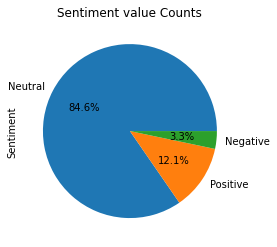

In [ ]:
data_sen['Sentiment'].value_counts().plot.pie(autopct ='%1.1f%%').set_title('Sentiment value Counts')

# **Save file**

In [ ]:
data_sen.to_csv('/content/drive/MyDrive/Capstone Project/Data/pan12_chatlog.csv', index = False)